In [1]:
import os
import sys
main_folder_path = os.path.abspath('..')
sys.path.append(main_folder_path)
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from materials_vision.data_loader import DataLoader

In [3]:
data = DataLoader().load_data_dict('AS')

In [4]:
def show_random_img(data: dict, subseries_name: str, magnification=None, show:bool = True, random_seed=42):
    if random_seed > -1:
        np.random.seed(random_seed)
    images_paths = data[subseries_name]
    if magnification:
        images_paths = str(magnification) in images_paths
    rand_img = np.random.choice(images_paths)
    rand_img = cv2.imread(rand_img)
    if show:
        plt.imshow(rand_img)
        # plt.axis('off')
        print(rand_img.shape)
    return rand_img

In [5]:
def crop_image(img, height_after_cropping: int = 960):
    return img[0:height_after_cropping]

(1040, 1280, 3)


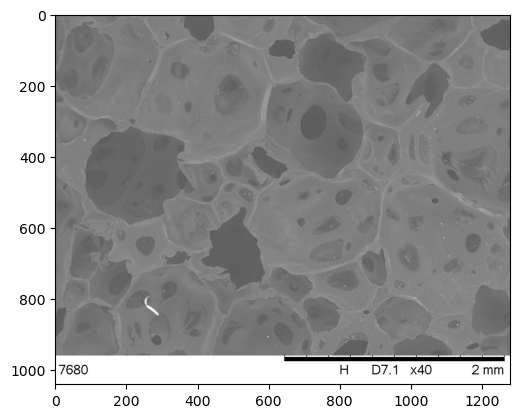

In [6]:
img = show_random_img(data, 'AS3', random_seed=-1)

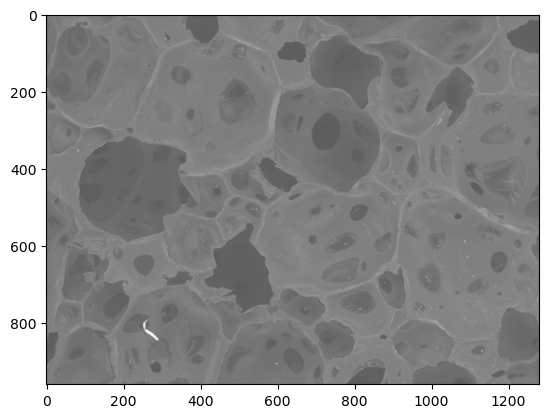

In [7]:
cropped_img = crop_image(img)
plt.imshow(cropped_img)


In [8]:
from segment_anything import SamPredictor, sam_model_registry
from config import SAM_VIT_B_WEIGHTS

In [11]:
sam = sam_model_registry['vit_b'](checkpoint=SAM_VIT_B_WEIGHTS)
predictor = SamPredictor(sam)

In [12]:
from segment_anything import SamAutomaticMaskGenerator